In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import clear_output 
import calendar
from datetime import datetime, timedelta
import math

In [26]:
#@title <font color='Blue'>**Import**</font>
!pip install yfinance
!pip install pandas_datareader
import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd
yf.pdr_override() 

clear_output()

In [27]:
#@title <font color='Blue'>**Method**</font>
def bscall(S, K, T, r, sig):
    d1 = (np.log(S/K) + (r + 0.5 *sig**2) * T )/(sig * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

def bsput(S, K, T, r, sig):
    d1 = (np.log(S / K) + (r + 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    return K * np.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)

In [49]:
#@title <font color='Blue'>**Condition Setting**</font>
# ======== 1 ======== #
r = 0.00 # 0.0으로 두면 계산이 편해짐 -> 이자율만 이야기함.
sig = 0.2  # 주식의 변동성 - 20%가 가장 흔히 쓰는 주식의 변동성
T = 30/365 # 1년 중 30일
M = 1000
N = 30 # 나눔수
dt = T/N # T를 N개로 나눠서 보겠다.
rdt = r * dt
sigsdt = sig * np.sqrt(dt)

In [50]:
#@title <font color='Blue'>**Data Setting**</font>
S0 = 100

S = np.empty([M,N+1])
rv = np.random.normal(r*dt,sigsdt,[M,N])
for i in range(M):
  S[i,0] = S0
  for j in range(N):
    S[i,j+1] = S[i,j] * (1+rv[i,j])

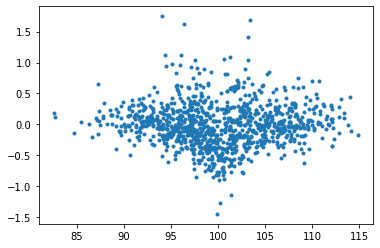

In [51]:
a = []
K = 100

for i in range(M):
    cost = 0
    price = S[i,0]
    for j in range(N):
        d1 = (np.log(S[i,j]/K) + (r + 0.5 *sig**2) * (T-j*dt))/(sig * np.sqrt(T-j*dt)) # Black Scholes의 Call option delta
        delta = norm.cdf(d1)
        cost = cost + delta * (price-S[i,j+1])
        price = S[i,j+1]

    cost = cost + np.maximum(S[i, N] - K, 0) - bscall(S[0][0],K,T,r,sig)
    a.append(cost)

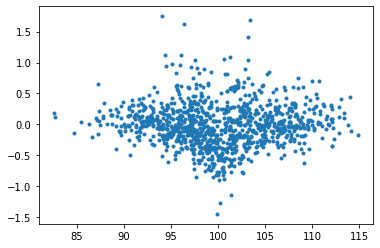

In [52]:
#@title <font color='Blue'>**Result**</font>
plt.plot(S[:,-1], a, marker=".", linestyle='none')

# REAL DATA

In [53]:
#@title <font color='Blue'>**Data Setting**</font>
STOCK_CODE = "^KS11"
start_date = "2015-01-01"
end_date = "2022-10-01"

STOCK_DATA = pdr.get_data_yahoo(STOCK_CODE, start=start_date, end=end_date)["Close"]
stockArray = STOCK_DATA.to_numpy()
M = math.floor(len(stockArray)/(N+1))
S = stockArray[:M*(N+1)].reshape(M,N+1)

[*********************100%***********************]  1 of 1 completed


In [55]:
#@title <font color='Blue'>**BlackSholesModel**</font>
a = []
K = S[0][0]

for i in range(M):
    cost = 0
    price = S[i,0]
    for j in range(N):
        d1 = (np.log(price/K)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta = norm.cdf(d1)  
        cost = cost + delta*(price-S[i,j])
        price = S[i,j+1]

    cost = cost + np.maximum(S[i,N]-K,0) - bscall(S[0][0],K,T,r,sig)
    a.append(cost)

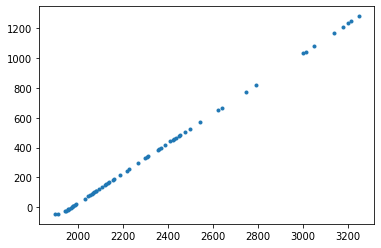

In [56]:
#@title <font color='Blue'>**Result**</font>
plt.plot(S[:,-1], a, marker=".", linestyle='none')